 Part 1: Analyze Unemployment Rate Data 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Load the dataset
df = pd.read_csv(r'C:\Users\asus\Desktop\Alpha Code\Unemployment_Rate_upto_11_2020.csv')


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.head())


           region         date frequency  estimated_unemployment_rate_(%)  \
0  Andhra Pradesh   31-01-2020         M                             5.48   
1  Andhra Pradesh   29-02-2020         M                             5.83   
2  Andhra Pradesh   31-03-2020         M                             5.79   
3  Andhra Pradesh   30-04-2020         M                            20.51   
4  Andhra Pradesh   31-05-2020         M                            17.43   

   estimated_employed  estimated_labour_participation_rate_(%) region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.912

In [6]:
print("\nColumn Info:\n", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   region                                   267 non-null    object 
 1   date                                     267 non-null    object 
 2   frequency                                267 non-null    object 
 3   estimated_unemployment_rate_(%)          267 non-null    float64
 4   estimated_employed                       267 non-null    int64  
 5   estimated_labour_participation_rate_(%)  267 non-null    float64
 6   region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB

Column Info:
 None


In [7]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 region                                     0
date                                       0
frequency                                  0
estimated_unemployment_rate_(%)            0
estimated_employed                         0
estimated_labour_participation_rate_(%)    0
region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64


Part 2: Data Cleaning, Exploration & Trends

In [9]:


# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])  # Remove rows with invalid dates


C:\Users\asus\AppData\Local\Temp\ipykernel_13044\3479770766.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


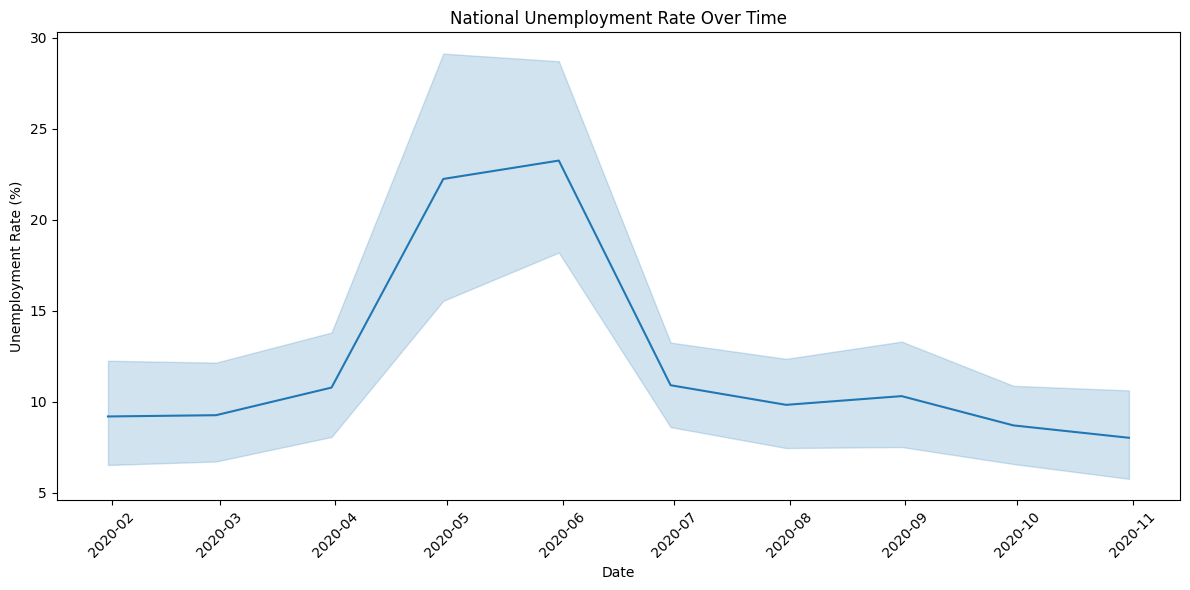

In [11]:

# Basic trend line of unemployment rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='estimated_unemployment_rate_(%)')
plt.title("National Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Part 3: Investigate Covid-19 Impact

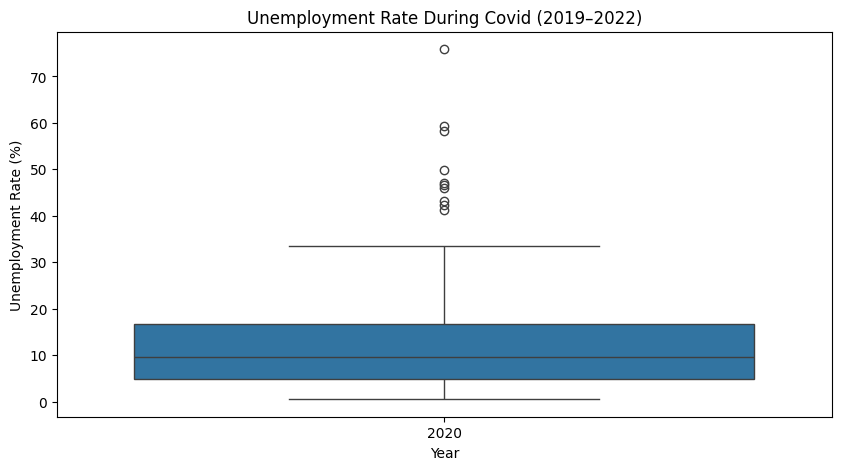

In [14]:
# Focus on years 2019 to 2022
df['year'] = df['date'].dt.year

# Filter for Covid-relevant period
covid_df = df[(df['year'] >= 2019) & (df['year'] <= 2022)]

# Boxplot comparison
plt.figure(figsize=(10, 5))
sns.boxplot(data=covid_df, x='year', y='estimated_unemployment_rate_(%)')
plt.title("Unemployment Rate During Covid (2019–2022)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


Part 4: Identify Key Patterns or Seasonal Trends

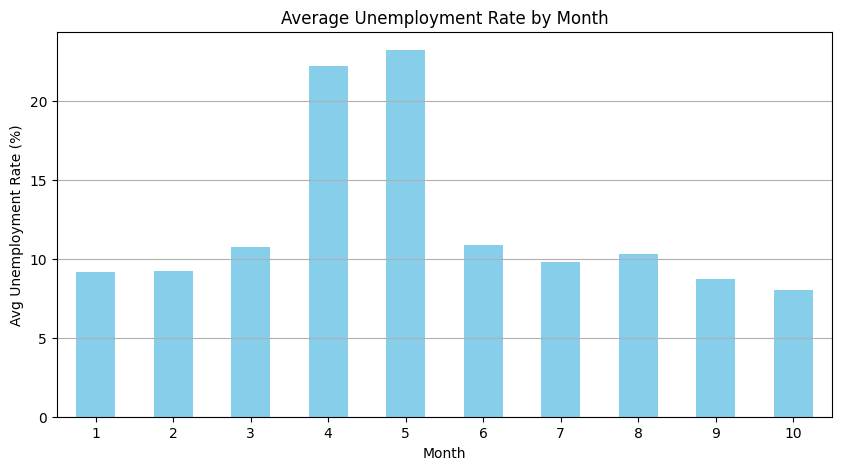

In [16]:
# Extract month for seasonal analysis
df['month'] = df['date'].dt.month

# Monthly average unemployment
monthly_avg = df.groupby('month')['estimated_unemployment_rate_(%)'].mean()

# Bar chart
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Avg Unemployment Rate (%)")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


Part 5: Present Insights

In [27]:
# Rename for easier access 
df.rename(columns={'estimated_unemployment_rate_(%)': 'unemployment_rate'}, inplace=True)


In [28]:

# Basic statistics
print("Overall Average Unemployment Rate:", round(df['unemployment_rate'].mean(), 2))
print("Highest Recorded Rate:", df['unemployment_rate'].max())
print("Lowest Recorded Rate:", df['unemployment_rate'].min())


Overall Average Unemployment Rate: 12.24
Highest Recorded Rate: 75.85
Lowest Recorded Rate: 0.5


In [29]:

# Top 5 months with highest unemployment
print("\nTop 5 Highest Unemployment Records:")
print(df.sort_values(by='unemployment_rate', ascending=False).head())



Top 5 Highest Unemployment Records:
         region       date frequency  unemployment_rate  estimated_employed  \
172  Puducherry 2020-04-30         M              75.85              117542   
103   Jharkhand 2020-05-31         M              59.23             4145385   
173  Puducherry 2020-05-31         M              58.19              172308   
210  Tamil Nadu 2020-04-30         M              49.83             9719167   
102   Jharkhand 2020-04-30         M              47.09             5335262   

     estimated_labour_participation_rate_(%) region.1  longitude  latitude  \
172                                    39.30    South    11.9416   79.8083   
103                                    37.92     East    23.6102   85.2799   
173                                    33.19    South    11.9416   79.8083   
210                                    29.63    South    11.1271   78.6569   
102                                    37.69     East    23.6102   85.2799   

     year  month  


In [30]:

# Region-wise comparison
if 'region' in df.columns:
    region_avg = df.groupby('region')['unemployment_rate'].mean().sort_values(ascending=False)
    print("\nAverage Unemployment Rate by Region:\n", region_avg)



Average Unemployment Rate by Region:
 region
Haryana             27.477000
Tripura             25.055000
Jharkhand           19.539000
Bihar               19.471000
Delhi               18.414000
Puducherry          17.942000
Jammu & Kashmir     16.477778
Himachal Pradesh    16.065000
Rajasthan           15.868000
Tamil Nadu          12.187000
Goa                 12.167000
Punjab              11.981000
Uttarakhand         11.156000
West Bengal         10.192000
Sikkim               9.792500
Uttar Pradesh        9.737000
Kerala               9.434000
Andhra Pradesh       8.664000
Maharashtra          7.979000
Chhattisgarh         7.819000
Karnataka            7.668000
Madhya Pradesh       6.854000
Telangana            6.833000
Odisha               6.462000
Gujarat              6.376000
Assam                4.856000
Meghalaya            3.866000
Name: unemployment_rate, dtype: float64
